# Hierarchical Agglomerative Clustering
### Hierarchical Agglomerative Clustering (HAC) is a type of clustering algorithm used to group similar objects into clusters. 
In HAC, each object starts as its own cluster and then these clusters are merged into larger clusters in a "bottom-up" manner until all objects belong to a single cluster or until a stopping criterion is met.

### Real World Use Cases
HAC has many real world use cases, including:

**Customer Segmentation**: HAC can be used to segment customers based on their demographic information, purchase history, and other related data to target them with personalized marketing campaigns.

**Image Segmentation**: HAC can be used to segment images into different regions, for example, separating foreground from background in an image.

**Document Clustering**: HAC can be used to group documents into topics or categories based on their content and similarity.

**Social Network Analysis**: HAC can be used to analyze social networks to identify communities or groups of individuals with similar interests or relationships.

**Market Basket Analysis**: HAC can be used to analyze market basket data to identify items that are frequently purchased together and to make recommendations to customers.

## Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.patches as mpatches

Create a random array which will be used for Hierarchicial Agglomerative Clustering 

In [2]:
np.random.seed(10)
X = np.random.rand(50,2)

Plot the points generated in the array in order to visualize them. 
    The goal is to cluster these using different hierarchical agglomerative clustering techniques.

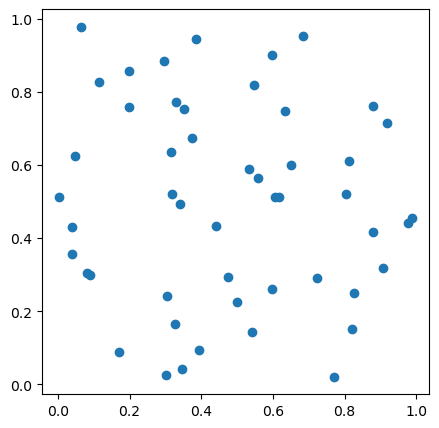

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], label = 'True Position')
    
plt.show()

First cluster technique used, **Single Linkage**: merges two clusters if they have the closest pair of elements. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) on the right-most part of the visual at roughly between 0.125 and 0.135. This spot is highlighted by the dashed red line. We note that there are *10 clusters* at this point for the Single Linkage method. 

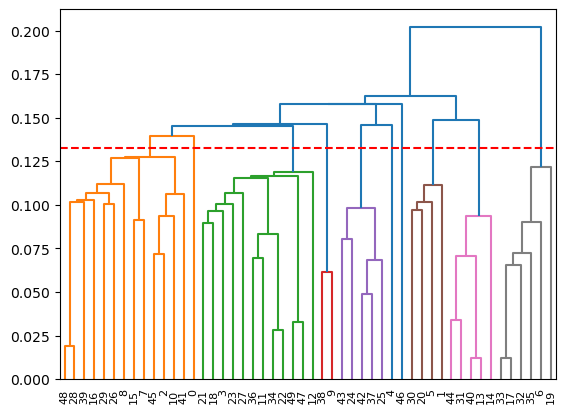

In [4]:
linked_s = linkage(X, 'single')
labels = range(1,100)

dendrogram(linked_s, orientation = 'top', distance_sort = 'descending')
plt.axhline(y=0.1325, color='r', linestyle='--')

plt.show()

Second cluster technique used, **Complete Linkage**: merges two clusters if they have the farthest pair of elements. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) on the right-most part of the visual at roughly around 0.415. This spot is highlighted by the dashed red line. We note that there are *9 clusters* at this point for the Complete Linkage method.

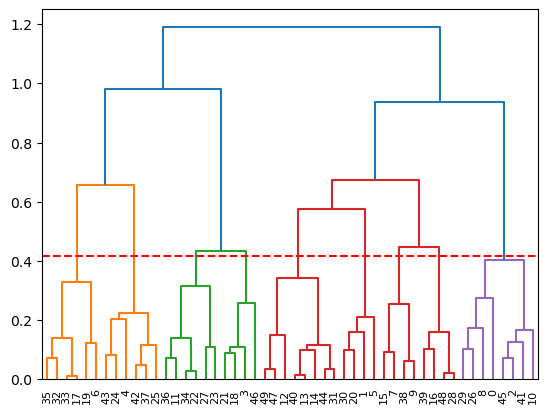

In [5]:
linked_c = linkage(X, 'complete')
labels = range(1,100)

dendrogram(linked_c, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.415, color = 'r', linestyle = '--')

plt.show()

Third cluster technique used, **Average Linkage**: merges two clusters based on the average pairwise distance between elements in the two clusters. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) is in the middle of the visual around 0.325. This spot is highlighted by the dashed red line. We note that there are *7 clusters* at this point for the Average Linkage method.

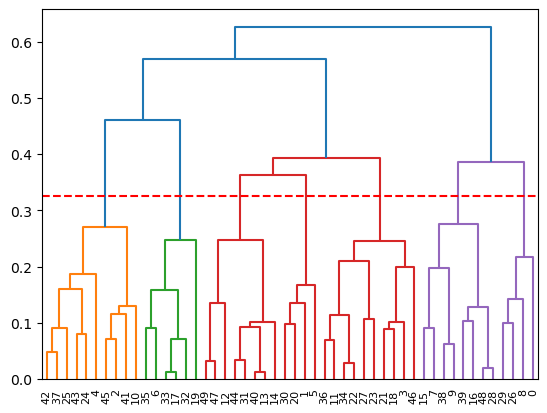

In [6]:
linked_a = linkage(X, 'average')
labels = range(1,100)

dendrogram(linked_a, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.325, color='r', linestyle='--')

plt.show()

Fourth cluster technique used, **Ward Linkage**: minimizes the variance of the distances between the merged cluster and all other points. 

Inspecting the dendrogram helps us determine the optimal number of clusters to use. We note that the longest vertical line (largest distance) is in the middle of the visual around 0.6. This spot is highlighted by the dashed red line. We note that there are *7 clusters* at this point for the Ward Linkage method.

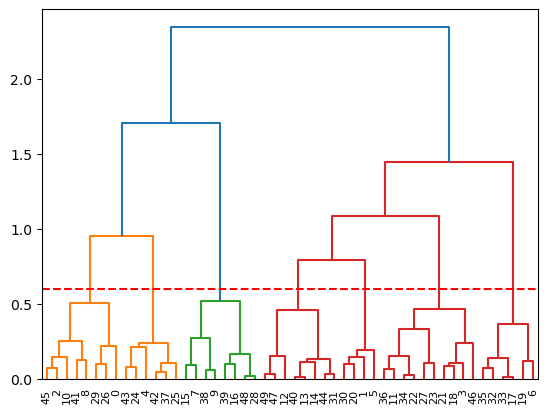

In [7]:
linked_w = linkage(X, 'ward')
labels = range(1,100)

dendrogram(linked_w, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.axhline(y=0.6, color = 'r', linestyle='--')

plt.show()

**Grouping the clusters** using the cluster sizes calculated above.

In [8]:
cluster_s = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')
print('Single Cluster:', cluster_s.fit_predict(X), '\n')

cluster_c = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='complete')
print('Complete Cluster:', cluster_c.fit_predict(X), '\n')

cluster_a = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
print('Average Cluster:', cluster_a.fit_predict(X), '\n')

cluster_w = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
print('Ward Cluster:', cluster_w.fit_predict(X))

Single Cluster: [9 4 0 3 5 4 1 0 0 6 0 3 3 2 2 0 0 1 3 1 4 3 3 3 8 8 0 3 0 0 4 2 1 1 3 1 3
 8 6 0 2 0 8 8 2 0 7 3 0 3] 

Complete Cluster: [0 6 0 8 5 6 4 2 0 2 0 3 1 1 1 2 7 4 8 4 6 8 3 3 5 5 0 3 7 0 6 1 4 4 3 4 3
 5 2 7 1 0 5 5 1 0 8 1 7 1] 

Average Cluster: [5 6 2 4 2 6 3 0 5 0 2 4 1 1 1 0 0 3 4 3 6 4 4 4 2 2 5 4 0 5 6 1 3 3 4 3 4
 2 0 0 1 2 2 2 1 2 4 1 0 1] 

Ward Cluster: [1 6 1 4 5 6 3 0 1 0 1 4 2 2 2 0 0 3 4 3 6 4 4 4 5 5 1 4 0 1 6 2 3 3 4 3 4
 5 0 0 2 1 5 5 2 1 4 2 0 2]


**Plotting the clusters** using color-coded points to highlight each cluster. 

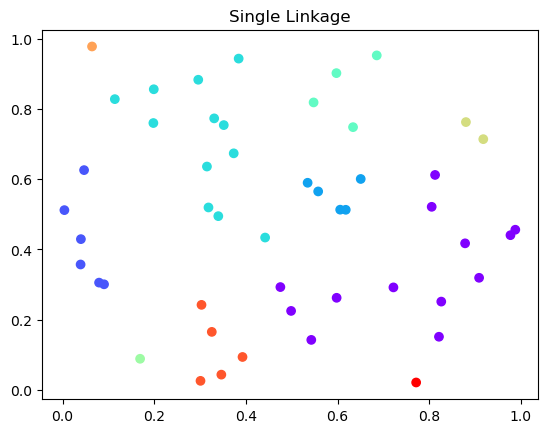

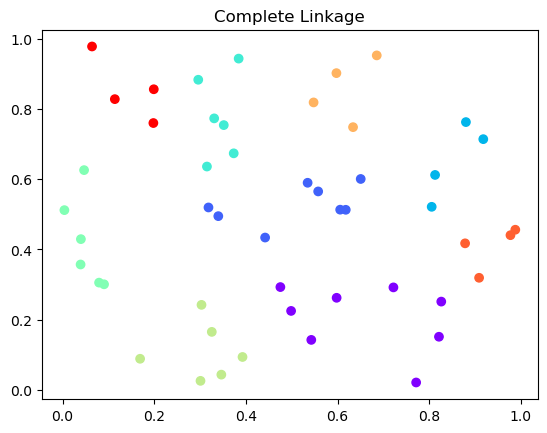

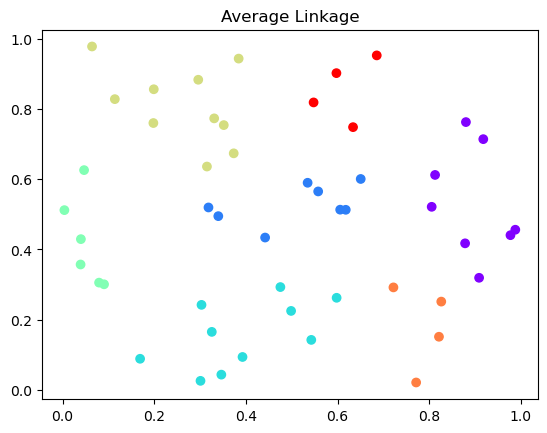

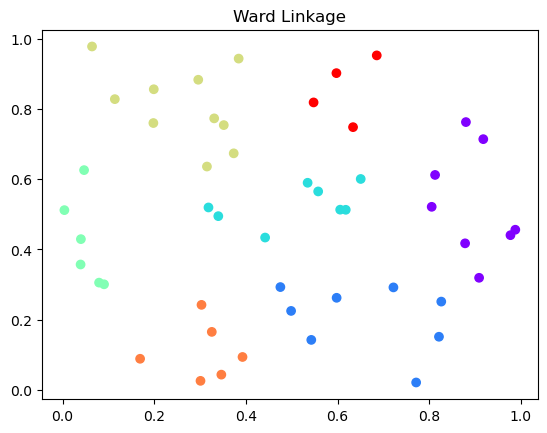

In [9]:
plt.figsize = (2,2)
plt.scatter(X[:,0], X[:,1], c = cluster_s.labels_, cmap='rainbow')

##Below is code to show the cluster names in the plot legend if desired. 
##Given these clusters correspond to a created array and are not from real-world data, 
##the legend is currently hidden as there is no additional benefit to showing cluster names.

# clusters_s = set(cluster_s.labels_)
# colors = [plt.cm.rainbow(i) for i in np.linspace(0, 1, len(clusters_s))]
# legend_handles = [mpatches.Patch(color=colors[i], label=f"Cluster {cluster}") for i, cluster in enumerate(clusters_s)]
# plt.legend(handles=legend_handles, loc="upper right")
plt.title('Single Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_c.labels_, cmap='rainbow')
plt.title('Complete Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_a.labels_, cmap='rainbow')
plt.title('Average Linkage')
plt.show()

plt.scatter(X[:,0], X[:,1], c = cluster_w.labels_, cmap='rainbow')
plt.title('Ward Linkage')
plt.show()